# ASSIGNMENT #6 - MODEL DATA #
Due: 21 April 2024 @ 11:59p

Purpose:\
The purpose of this assignment is to examine the netCDF data format using model data and plotting the output.  

Overview:\
In this assignment you will read in ECMWF ERA-40 Reanalysis netCDF4 and plot the data on a map.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 21 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [1]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Rebecca Jacoby"
__contact__   = "rebecca.jacoby@ndus.edu"

### IMPORT REQUIRED LIBRARIES ###

In [1]:
import numpy as np
from datetime import datetime, timedelta
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

### OPEN NETCDF FILE ###

In [2]:
data = Dataset('ECMWF_ERA-40_subset.nc','r')
    
#analyze the variables and plot (on a map) SLP, 10-m winds, and total precipitation
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
time = data.variables['time'][:] #hours since 1900-01-01 00:00:0.0


start_time = datetime(1900,1,1,0,0)
dts = np.empty(len(time), dtype=datetime)
for index, t in enumerate(time):
    dts[index] = start_time + timedelta(hours=int(t))
    
tp = data.variables['tp'][:]*1000
p10u = data.variables['p10u'][:]*1.94384
p10v = data.variables['p10v'][:]*1.94384
msl = data.variables['msl'][:]/100





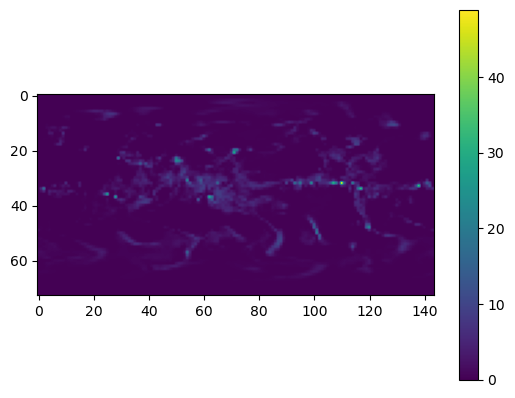

In [14]:
plt.imshow(tp[7])
plt.colorbar()
plt.show()


/home/rebecca.jacoby/miniconda3/envs/atsc270/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'color'
  result = super().contour(*args, **kwargs)


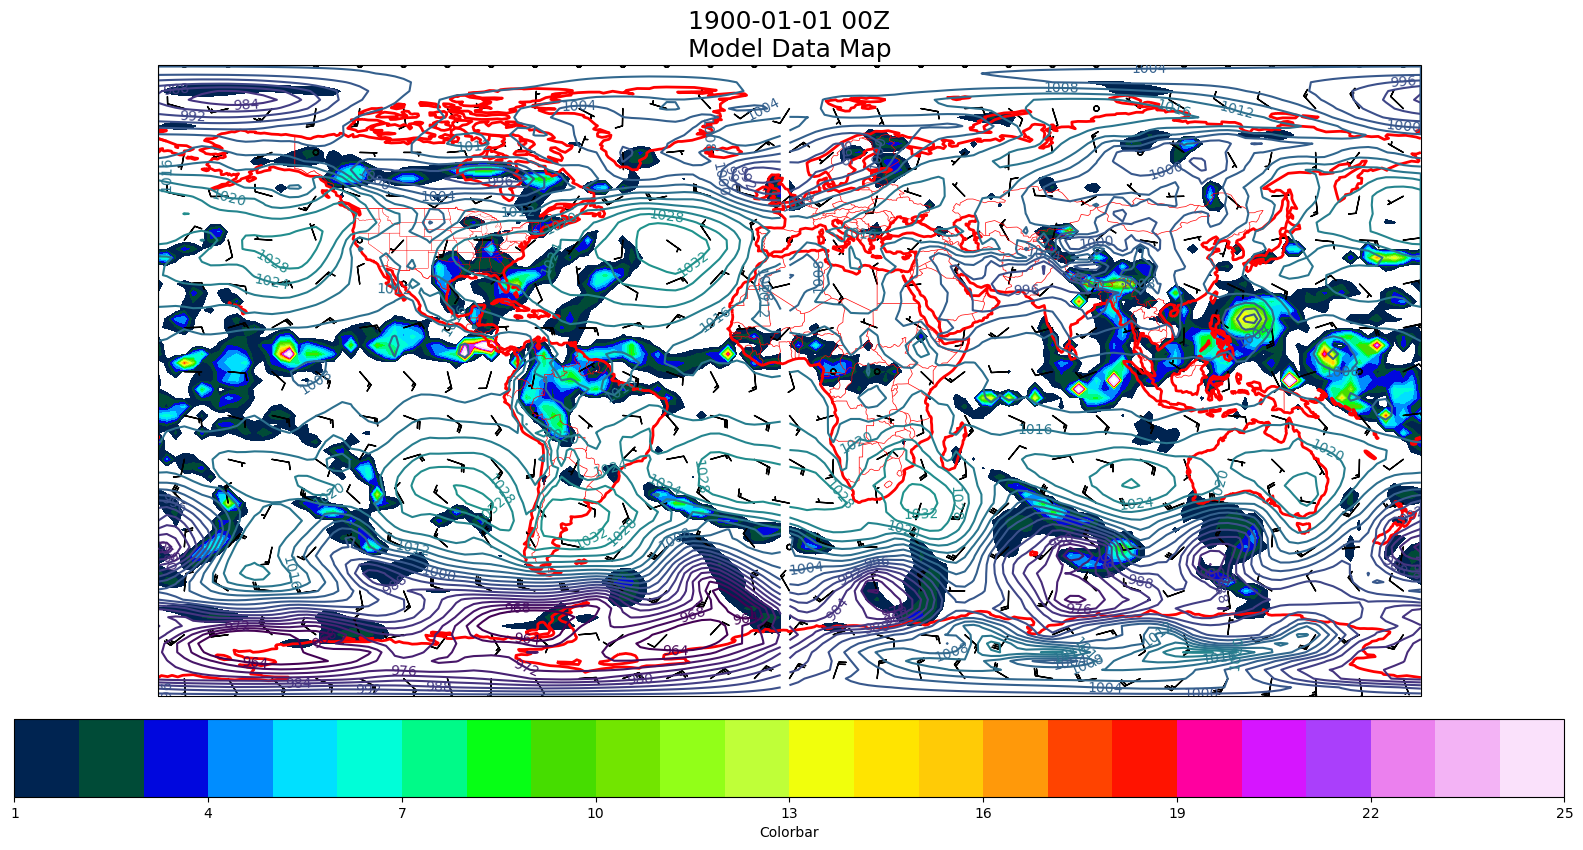

In [18]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(20,10),dpi=100)
ax = fig.add_subplot(1,1,1,projection=proj)

clevs = np.arange(964,1100,4)
cs = ax.contour(lon,lat, msl[0],levels=clevs, color='k',transform=ccrs.PlateCarree())
ax.clabel(cs, inline=True)
plt.contourf(lon, lat, tp[1], cmap = 'gist_ncar', transform=ccrs.PlateCarree(), levels=np.arange(1, 26, 1))

#plot wind barbs
plt.barbs(lon[::5], lat[::5], p10u[0, ::5, ::5], p10v[0, ::5, ::5], transform = ccrs.PlateCarree(), length=5)

#Add features to the map
ax.add_feature(cfeature.COASTLINE, linewidth=2, edgecolor='r')
ax.add_feature(cfeature.STATES, linewidth=0.2, edgecolor='r')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='r')


#add a title with the date
plt.title(f'{start_time.strftime("%Y-%m-%d %HZ")}\nModel Data Map', fontsize=18)


#set up the color bar (orientation=horizontal or vertical)
cb = plt.colorbar(label='Colorbar', orientation='horizontal', pad=0.03)
cb.ax.tick_params(labelsize=10)


#save the map
plt.savefig('Model Data Map.png')

